In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [48]:
df = pd.read_csv('TODAY.csv')

In [49]:
df.head()


,Country,State,Year,City Name,Type Of Weather,Total Number Of Accidents (UOM:Number),Number Of Persons Killed In Road Accident (UOM:Number),Number Of Grievously Injured Persons (UOM:Number),Number Of Minor Injured Persons (UOM:Number),Number Of Total Injured Persons (UOM:Number)
0,India,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Foggy & Misty,75,24,21,48,69
1,India,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Hail/Sleet,0,0,0,0,0
2,India,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Others,0,0,0,0,0
3,India,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Rainy,8,2,0,7,7
4,India,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Sunny/Clear,1412,328,453,862,1315


In [50]:
df.columns

Index(['Country', 'State', 'Year', 'City Name', 'Type Of Weather',
       'Total Number Of Accidents  (UOM:Number)',
       'Number Of Persons Killed In Road Accident (UOM:Number)',
       'Number Of Grievously Injured Persons (UOM:Number)',
       'Number Of Minor Injured Persons (UOM:Number)',
       'Number Of Total Injured Persons (UOM:Number)'],
      dtype='object')

In [51]:
df.shape

(750, 10)

In [52]:
df.describe()

,Total Number Of Accidents (UOM:Number),Number Of Persons Killed In Road Accident (UOM:Number),Number Of Grievously Injured Persons (UOM:Number),Number Of Minor Injured Persons (UOM:Number),Number Of Total Injured Persons (UOM:Number)
count,750.000000,750.000000,750.000000,750.000000,750.000000
mean,278.424000,62.253333,105.478667,139.045333,244.524000
std,615.034287,122.096494,286.067955,379.682670,567.551986
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.000000,9.000000,11.500000,9.000000,28.500000
75%,212.500000,74.750000,69.750000,71.750000,164.750000
max,5251.000000,1228.000000,2818.000000,3809.000000,5156.000000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 10 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   Country                                                 750 non-null    object
 1   State                                                   750 non-null    object
 2   Year                                                    750 non-null    object
 3   City Name                                               750 non-null    object
 4   Type Of Weather                                         750 non-null    object
 5   Total Number Of Accidents  (UOM:Number)                 750 non-null    int64 
 6   Number Of Persons Killed In Road Accident (UOM:Number)  750 non-null    int64 
 7   Number Of Grievously Injured Persons (UOM:Number)       750 non-null    int64 
 8   Number Of Minor Injured Persons (UOM:Number)      

In [54]:
df[df.isna().any(axis=1)]

,Country,State,Year,City Name,Type Of Weather,Total Number Of Accidents (UOM:Number),Number Of Persons Killed In Road Accident (UOM:Number),Number Of Grievously Injured Persons (UOM:Number),Number Of Minor Injured Persons (UOM:Number),Number Of Total Injured Persons (UOM:Number)


In [55]:
df1=df.copy(deep=True)

In [56]:
df1.isna().sum()

Country                                                   0
State                                                     0
Year                                                      0
City Name                                                 0
Type Of Weather                                           0
Total Number Of Accidents  (UOM:Number)                   0
Number Of Persons Killed In Road Accident (UOM:Number)    0
Number Of Grievously Injured Persons (UOM:Number)         0
Number Of Minor Injured Persons (UOM:Number)              0
Number Of Total Injured Persons (UOM:Number)              0
dtype: int64

In [57]:
df1.dropna(axis=1,thresh=2,inplace=True)

In [58]:
df1.shape

(750, 10)

In [59]:
df1.count()

Country                                                   750
State                                                     750
Year                                                      750
City Name                                                 750
Type Of Weather                                           750
Total Number Of Accidents  (UOM:Number)                   750
Number Of Persons Killed In Road Accident (UOM:Number)    750
Number Of Grievously Injured Persons (UOM:Number)         750
Number Of Minor Injured Persons (UOM:Number)              750
Number Of Total Injured Persons (UOM:Number)              750
dtype: int64

In [60]:
df2 = df1[['State', 'Year','City Name', 'Type Of Weather', 'Total Number Of Accidents  (UOM:Number)']]
df2


,State,Year,City Name,Type Of Weather,Total Number Of Accidents (UOM:Number)
0,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Foggy & Misty,75
1,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Hail/Sleet,0
2,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Others,0
3,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Rainy,8
4,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Sunny/Clear,1412
...,...,...,...,...,...
745,West Bengal,"Financial Year (Apr - Mar), 2021",Kolkata,Foggy & Misty,52
746,West Bengal,"Financial Year (Apr - Mar), 2021",Kolkata,Hail/Sleet,0
747,West Bengal,"Financial Year (Apr - Mar), 2021",Kolkata,Others,38
748,West Bengal,"Financial Year (Apr - Mar), 2021",Kolkata,Rainy,103


In [61]:
long_lat=pd.read_csv('Indian Cities Database.csv')
long_lat.head()

,City,Lat,Long,country,iso2,State
0,Abohar,30.144533,74.195520,India,IN,Punjab
1,Adilabad,19.400000,78.310000,India,IN,Telangana
2,Agartala,23.836049,91.279386,India,IN,Tripura
3,Agra,27.187935,78.003944,India,IN,Uttar Pradesh
4,Ahmadnagar,19.094571,74.738432,India,IN,Maharashtra


In [62]:
long_lat.shape

(213, 6)

In [63]:
long_lat.columns

Index(['City', 'Lat', 'Long', 'country', 'iso2', 'State'], dtype='object')

In [64]:
long_lat[long_lat.isna().any(axis=1)]

,City,Lat,Long,country,iso2,State


In [65]:
# Keep only the specified columns
filtered_long_lat = long_lat[['City', 'Lat', 'Long']]

# Optionally, reset the index if you want a clean DataFrame
filtered_long_lat.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
filtered_long_lat.head()

,City,Lat,Long
0,Abohar,30.144533,74.195520
1,Adilabad,19.400000,78.310000
2,Agartala,23.836049,91.279386
3,Agra,27.187935,78.003944
4,Ahmadnagar,19.094571,74.738432


In [66]:
print(set(filtered_long_lat['City']))

{'Pilibhit', 'Jamshedpur', 'Jammu', 'Muzaffarpur', 'Nagercoil', 'Bidar', 'Saidpur', 'Sonipat', 'Belgaum', 'Ajmer', 'Udaipur', 'Chikka Mandya', 'Tirupati', 'Puducherry', 'Chandigarh ', 'Khammam', 'Kalyan', 'Mirzapur', 'Mysore', 'Latur', 'Bijapur', 'Tirunelveli', 'DehraDun', 'Amritsar', 'Bhavnagar', 'Haora', 'Jorhat', 'Raipur', 'Samlaipadar', 'Salem', 'Shimla', 'Chennai', 'Bhilai', 'Gopalpur', 'Bamanpuri', 'Vizianagaram', 'Panipat', 'Gurugram', 'Patna', 'Agartala', 'Meerut', 'Guntur', 'Sirsa', 'Itanagar', 'Machilipatnam', 'Tezpur', 'Jodhpur', 'Alappuzha', 'Rajkot', 'Lucknow', 'Bilaspur', 'Puri', 'Porbandar', 'Tharati Etawah', 'Ujjain', 'Gwalior', 'Budaun', 'Bulandshahr', 'Jabalpur', 'Saidapur', 'Nandyal', 'Sangli', 'Kurnool', 'Aizawl  ', 'Tonk', 'Varanasi', 'Kollam', 'Ghaziabad', 'Bharatpur', 'Pathankot', 'Guwahati', 'Kolar', 'Aurangabad', 'Asansol', 'Kavaratti', 'Amaravati', 'Navsari', 'Dindigul', 'Mumbai', 'Raichur', 'Talcher', 'Ratlam', 'Agra', 'Kagaznagar', 'Rajahmundry', 'Mangalore'

In [67]:
# Merge the two DataFrames on the 'City Name' column
merged_data = pd.merge(df2, filtered_long_lat, left_on='City Name', right_on='City', how='left')

# Display the resulting merged DataFrame
merged_data.head()

,State,Year,City Name,Type Of Weather,Total Number Of Accidents (UOM:Number),City,Lat,Long
0,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Foggy & Misty,75,NaN,NaN,NaN
1,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Hail/Sleet,0,NaN,NaN,NaN
2,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Others,0,NaN,NaN,NaN
3,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Rainy,8,NaN,NaN,NaN
4,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Sunny/Clear,1412,NaN,NaN,NaN


In [68]:
merged_data[merged_data.isna().any(axis=1)]

,State,Year,City Name,Type Of Weather,Total Number Of Accidents (UOM:Number),City,Lat,Long
0,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Foggy & Misty,75,NaN,NaN,NaN
1,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Hail/Sleet,0,NaN,NaN,NaN
2,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Others,0,NaN,NaN,NaN
3,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Rainy,8,NaN,NaN,NaN
4,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Sunny/Clear,1412,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
760,West Bengal,"Financial Year (Apr - Mar), 2021",Kolkata,Foggy & Misty,52,NaN,NaN,NaN
761,West Bengal,"Financial Year (Apr - Mar), 2021",Kolkata,Hail/Sleet,0,NaN,NaN,NaN
762,West Bengal,"Financial Year (Apr - Mar), 2021",Kolkata,Others,38,NaN,NaN,NaN
763,West Bengal,"Financial Year (Apr - Mar), 2021",Kolkata,Rainy,103,NaN,NaN,NaN


In [69]:
merged_data[merged_data.isna().any(axis=1)]

,State,Year,City Name,Type Of Weather,Total Number Of Accidents (UOM:Number),City,Lat,Long
0,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Foggy & Misty,75,NaN,NaN,NaN
1,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Hail/Sleet,0,NaN,NaN,NaN
2,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Others,0,NaN,NaN,NaN
3,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Rainy,8,NaN,NaN,NaN
4,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Sunny/Clear,1412,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
760,West Bengal,"Financial Year (Apr - Mar), 2021",Kolkata,Foggy & Misty,52,NaN,NaN,NaN
761,West Bengal,"Financial Year (Apr - Mar), 2021",Kolkata,Hail/Sleet,0,NaN,NaN,NaN
762,West Bengal,"Financial Year (Apr - Mar), 2021",Kolkata,Others,38,NaN,NaN,NaN
763,West Bengal,"Financial Year (Apr - Mar), 2021",Kolkata,Rainy,103,NaN,NaN,NaN


In [70]:
# Find all rows where latitude and longitude are NaN
cities_with_nan_coords = merged_data[merged_data['Lat'].isna() & merged_data['Long'].isna()]
print(set(cities_with_nan_coords['City Name']))

{'Vadodra', 'Tiruchirapalli', 'Kanpur', 'Kolkata', 'Bhopal', 'Nagpur', 'Allahabad(Prayagraj)', 'Thrissur', 'Vijaywada city', 'Chandigarh', 'Mallapuram', 'Vizag', 'Asansol Durgapur', 'Thiruvanthapuram', 'Nashik', 'Khozikode', 'Kannur'}


In [71]:
print(set(filtered_long_lat['City']))

{'Pilibhit', 'Jamshedpur', 'Jammu', 'Muzaffarpur', 'Nagercoil', 'Bidar', 'Saidpur', 'Sonipat', 'Belgaum', 'Ajmer', 'Udaipur', 'Chikka Mandya', 'Tirupati', 'Puducherry', 'Chandigarh ', 'Khammam', 'Kalyan', 'Mirzapur', 'Mysore', 'Latur', 'Bijapur', 'Tirunelveli', 'DehraDun', 'Amritsar', 'Bhavnagar', 'Haora', 'Jorhat', 'Raipur', 'Samlaipadar', 'Salem', 'Shimla', 'Chennai', 'Bhilai', 'Gopalpur', 'Bamanpuri', 'Vizianagaram', 'Panipat', 'Gurugram', 'Patna', 'Agartala', 'Meerut', 'Guntur', 'Sirsa', 'Itanagar', 'Machilipatnam', 'Tezpur', 'Jodhpur', 'Alappuzha', 'Rajkot', 'Lucknow', 'Bilaspur', 'Puri', 'Porbandar', 'Tharati Etawah', 'Ujjain', 'Gwalior', 'Budaun', 'Bulandshahr', 'Jabalpur', 'Saidapur', 'Nandyal', 'Sangli', 'Kurnool', 'Aizawl  ', 'Tonk', 'Varanasi', 'Kollam', 'Ghaziabad', 'Bharatpur', 'Pathankot', 'Guwahati', 'Kolar', 'Aurangabad', 'Asansol', 'Kavaratti', 'Amaravati', 'Navsari', 'Dindigul', 'Mumbai', 'Raichur', 'Talcher', 'Ratlam', 'Agra', 'Kagaznagar', 'Rajahmundry', 'Mangalore'

In [72]:
city_mapping = {
    'Vadodra': 'Vadodara',
    'Allahabad(Prayagraj)': 'Prayagraj',
    'Vizag':'Vishakhapatnam',
    'Khozikode':'Calicut',
    'Allahabad(Prayagraj)':'Allahabad',
    'Kolkata':'Kolkata ',
    'Thiruvanthapuram':'Thiruvananthapuram',
    'Asansol Durgapur':'Asansol',
    'Chandigarh':'Chandigarh ',
    'Bhopal':'Bhopal ',
    'Mallapuram':'Kumbakonam',
    'Tiruchirapalli':'Tiruchchirappalli',
    'Nashik':'Nasik'
    
    # Add other mappings as necessary
}

# Apply the mapping to 'City Name' in df2
df2['City Name'] = df2['City Name'].replace(city_mapping)

# Re-merge the data
merged_data = pd.merge(df2, filtered_long_lat, left_on='City Name', right_on='City', how='left')

# Check the result for missing lat/long values again
missing_coords = merged_data[merged_data['Lat'].isna()]
print(set(missing_coords['City Name']))

{'Kanpur', 'Nagpur', 'Thrissur', 'Vijaywada city', 'Kannur'}


C:\Users\Rajagopalan M P\AppData\Local\Temp\ipykernel_19408\2987081622.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['City Name'] = df2['City Name'].replace(city_mapping)


In [73]:
import requests

def get_coordinates_nominatim(city_name):
    """Fetch latitude and longitude using Nominatim."""
    base_url = "https://nominatim.openstreetmap.org/search"
    params = {
        'q': city_name,
        'format': 'json'
    }
    
    response = requests.get(base_url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        if data:
            lat = data[0]['lat']
            lng = data[0]['lon']
            return float(lat), float(lng)
    return None, None

# Example cities
cities = ['Nagpur', 'Vijaywada city', 'Thrissur', 'Kanpur', 'Kannur']

for city in cities:
    lat, lng = get_coordinates_nominatim(city)
    if lat is not None and lng is not None:
        print(f"Fetched coordinates for {city}: {lat}, {lng}")
    else:
        print(f"Could not fetch coordinates for {city}")

Could not fetch coordinates for Nagpur
Could not fetch coordinates for Vijaywada city
Could not fetch coordinates for Thrissur
Could not fetch coordinates for Kanpur
Could not fetch coordinates for Kannur


In [74]:
import pandas as pd

# Assuming merged_data is your existing DataFrame

# Step 1: Create a dictionary with the missing city coordinates
missing_city_coords = {
    'Nagpur': (21.1498134, 79.0820556),
    'Vijaywada city': (16.5193, 80.6305),
    'Thrissur': (10.5270099, 76.214621),
    'Kanpur': (26.4609135, 80.3217588),
    'Kannur': (11.8763836, 75.3737973)
}

# Step 2: Update the DataFrame
for city, (lat, lng) in missing_city_coords.items():
    # Find rows where City Name matches and update lat and lng
    merged_data.loc[merged_data['City Name'] == city, ['Lat', 'Long']] = lat, lng

# Display the updated DataFrame
merged_data[merged_data['City Name'].isin(missing_city_coords.keys())]

,State,Year,City Name,Type Of Weather,Total Number Of Accidents (UOM:Number),City,Lat,Long
0,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Foggy & Misty,75,NaN,16.519300,80.630500
1,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Hail/Sleet,0,NaN,16.519300,80.630500
2,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Others,0,NaN,16.519300,80.630500
3,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Rainy,8,NaN,16.519300,80.630500
4,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Sunny/Clear,1412,NaN,16.519300,80.630500
...,...,...,...,...,...,...,...,...
715,Uttar Pradesh,"Financial Year (Apr - Mar), 2021",Kanpur,Foggy & Misty,383,NaN,26.460914,80.321759
716,Uttar Pradesh,"Financial Year (Apr - Mar), 2021",Kanpur,Hail/Sleet,117,NaN,26.460914,80.321759
717,Uttar Pradesh,"Financial Year (Apr - Mar), 2021",Kanpur,Others,490,NaN,26.460914,80.321759
718,Uttar Pradesh,"Financial Year (Apr - Mar), 2021",Kanpur,Rainy,171,NaN,26.460914,80.321759


In [75]:
# Optionally drop the 'city' column
merged_data.drop(columns=['City'], inplace=True)


In [76]:
merged_data

,State,Year,City Name,Type Of Weather,Total Number Of Accidents (UOM:Number),Lat,Long
0,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Foggy & Misty,75,16.519300,80.630500
1,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Hail/Sleet,0,16.519300,80.630500
2,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Others,0,16.519300,80.630500
3,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Rainy,8,16.519300,80.630500
4,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Sunny/Clear,1412,16.519300,80.630500
...,...,...,...,...,...,...,...
760,West Bengal,"Financial Year (Apr - Mar), 2021",Kolkata,Foggy & Misty,52,22.562627,88.363044
761,West Bengal,"Financial Year (Apr - Mar), 2021",Kolkata,Hail/Sleet,0,22.562627,88.363044
762,West Bengal,"Financial Year (Apr - Mar), 2021",Kolkata,Others,38,22.562627,88.363044
763,West Bengal,"Financial Year (Apr - Mar), 2021",Kolkata,Rainy,103,22.562627,88.363044


In [77]:
# Assuming merged_data is your DataFrame
merged_data.to_csv('LONG_LAT.csv', index=False)


In [78]:
# List of unique weather conditions
weather_conditions = ['Foggy & Misty', 'Hail/Sleet', 'Others', 'Rainy', 'Sunny/Clear']

# Create a dictionary to store the dataframes for each weather condition
weather_dfs = {}

# Loop through the weather conditions and filter the dataframe
for weather in weather_conditions:
    weather_dfs[weather] = merged_data[merged_data['Type Of Weather'] == weather]

# Example: Access the dataframe for 'Foggy & Misty' weather
foggy_misty_df = weather_dfs['Foggy & Misty']
foggy_misty_df


,State,Year,City Name,Type Of Weather,Total Number Of Accidents (UOM:Number),Lat,Long
0,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Foggy & Misty,75,16.519300,80.630500
5,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vishakhapatnam,Foggy & Misty,171,17.704052,83.297663
10,Andhra Pradesh,"Financial Year (Apr - Mar), 2020",Vijaywada city,Foggy & Misty,7,16.519300,80.630500
15,Andhra Pradesh,"Financial Year (Apr - Mar), 2020",Vishakhapatnam,Foggy & Misty,71,17.704052,83.297663
20,Andhra Pradesh,"Financial Year (Apr - Mar), 2021",Vijaywada city,Foggy & Misty,34,16.519300,80.630500
...,...,...,...,...,...,...,...
740,West Bengal,"Financial Year (Apr - Mar), 2019",Kolkata,Foggy & Misty,147,22.562627,88.363044
745,West Bengal,"Financial Year (Apr - Mar), 2020",Asansol,Foggy & Misty,48,23.683333,86.983333
750,West Bengal,"Financial Year (Apr - Mar), 2020",Kolkata,Foggy & Misty,50,22.562627,88.363044
755,West Bengal,"Financial Year (Apr - Mar), 2021",Asansol,Foggy & Misty,48,23.683333,86.983333


In [79]:
# Example: Access the dataframe for 'Sunny/Clear' weather
sunny_clear_df = weather_dfs['Sunny/Clear']
sunny_clear_df


,State,Year,City Name,Type Of Weather,Total Number Of Accidents (UOM:Number),Lat,Long
4,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Sunny/Clear,1412,16.519300,80.630500
9,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vishakhapatnam,Sunny/Clear,992,17.704052,83.297663
14,Andhra Pradesh,"Financial Year (Apr - Mar), 2020",Vijaywada city,Sunny/Clear,1065,16.519300,80.630500
19,Andhra Pradesh,"Financial Year (Apr - Mar), 2020",Vishakhapatnam,Sunny/Clear,1207,17.704052,83.297663
24,Andhra Pradesh,"Financial Year (Apr - Mar), 2021",Vijaywada city,Sunny/Clear,1113,16.519300,80.630500
...,...,...,...,...,...,...,...
744,West Bengal,"Financial Year (Apr - Mar), 2019",Kolkata,Sunny/Clear,2048,22.562627,88.363044
749,West Bengal,"Financial Year (Apr - Mar), 2020",Asansol,Sunny/Clear,187,23.683333,86.983333
754,West Bengal,"Financial Year (Apr - Mar), 2020",Kolkata,Sunny/Clear,1536,22.562627,88.363044
759,West Bengal,"Financial Year (Apr - Mar), 2021",Asansol,Sunny/Clear,154,23.683333,86.983333


In [80]:
# You can save these dataframes or use them for further analysis.
rainy_df = weather_dfs['Rainy']
rainy_df

,State,Year,City Name,Type Of Weather,Total Number Of Accidents (UOM:Number),Lat,Long
3,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Rainy,8,16.519300,80.630500
8,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vishakhapatnam,Rainy,137,17.704052,83.297663
13,Andhra Pradesh,"Financial Year (Apr - Mar), 2020",Vijaywada city,Rainy,0,16.519300,80.630500
18,Andhra Pradesh,"Financial Year (Apr - Mar), 2020",Vishakhapatnam,Rainy,25,17.704052,83.297663
23,Andhra Pradesh,"Financial Year (Apr - Mar), 2021",Vijaywada city,Rainy,23,16.519300,80.630500
...,...,...,...,...,...,...,...
743,West Bengal,"Financial Year (Apr - Mar), 2019",Kolkata,Rainy,200,22.562627,88.363044
748,West Bengal,"Financial Year (Apr - Mar), 2020",Asansol,Rainy,2,23.683333,86.983333
753,West Bengal,"Financial Year (Apr - Mar), 2020",Kolkata,Rainy,71,22.562627,88.363044
758,West Bengal,"Financial Year (Apr - Mar), 2021",Asansol,Rainy,8,23.683333,86.983333


In [81]:
others_df = weather_dfs['Others']
others_df

,State,Year,City Name,Type Of Weather,Total Number Of Accidents (UOM:Number),Lat,Long
2,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Others,0,16.519300,80.630500
7,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vishakhapatnam,Others,362,17.704052,83.297663
12,Andhra Pradesh,"Financial Year (Apr - Mar), 2020",Vijaywada city,Others,0,16.519300,80.630500
17,Andhra Pradesh,"Financial Year (Apr - Mar), 2020",Vishakhapatnam,Others,453,17.704052,83.297663
22,Andhra Pradesh,"Financial Year (Apr - Mar), 2021",Vijaywada city,Others,58,16.519300,80.630500
...,...,...,...,...,...,...,...
742,West Bengal,"Financial Year (Apr - Mar), 2019",Kolkata,Others,105,22.562627,88.363044
747,West Bengal,"Financial Year (Apr - Mar), 2020",Asansol,Others,190,23.683333,86.983333
752,West Bengal,"Financial Year (Apr - Mar), 2020",Kolkata,Others,26,22.562627,88.363044
757,West Bengal,"Financial Year (Apr - Mar), 2021",Asansol,Others,188,23.683333,86.983333


In [82]:
Hail_Sleet_df = weather_dfs['Hail/Sleet']
Hail_Sleet_df

,State,Year,City Name,Type Of Weather,Total Number Of Accidents (UOM:Number),Lat,Long
1,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Hail/Sleet,0,16.519300,80.630500
6,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vishakhapatnam,Hail/Sleet,44,17.704052,83.297663
11,Andhra Pradesh,"Financial Year (Apr - Mar), 2020",Vijaywada city,Hail/Sleet,0,16.519300,80.630500
16,Andhra Pradesh,"Financial Year (Apr - Mar), 2020",Vishakhapatnam,Hail/Sleet,9,17.704052,83.297663
21,Andhra Pradesh,"Financial Year (Apr - Mar), 2021",Vijaywada city,Hail/Sleet,0,16.519300,80.630500
...,...,...,...,...,...,...,...
741,West Bengal,"Financial Year (Apr - Mar), 2019",Kolkata,Hail/Sleet,0,22.562627,88.363044
746,West Bengal,"Financial Year (Apr - Mar), 2020",Asansol,Hail/Sleet,1,23.683333,86.983333
751,West Bengal,"Financial Year (Apr - Mar), 2020",Kolkata,Hail/Sleet,0,22.562627,88.363044
756,West Bengal,"Financial Year (Apr - Mar), 2021",Asansol,Hail/Sleet,0,23.683333,86.983333


In [83]:
# Step 1: Calculate the average number of accidents based on City Name and Type Of Weather
avg_accidents = merged_data.groupby(['State','City Name', 'Type Of Weather','Lat','Long'])['Total Number Of Accidents  (UOM:Number)'].mean().reset_index()

# Rename the column for clarity
avg_accidents.rename(columns={'Total Number Of Accidents  (UOM:Number)': 'Average Accidents'})


,State,City Name,Type Of Weather,Lat,Long,Average Accidents
0,Andhra Pradesh,Vijaywada city,Foggy & Misty,16.519300,80.630500,38.666667
1,Andhra Pradesh,Vijaywada city,Hail/Sleet,16.519300,80.630500,0.000000
2,Andhra Pradesh,Vijaywada city,Others,16.519300,80.630500,19.333333
3,Andhra Pradesh,Vijaywada city,Rainy,16.519300,80.630500,10.333333
4,Andhra Pradesh,Vijaywada city,Sunny/Clear,16.519300,80.630500,1196.666667
...,...,...,...,...,...,...
250,West Bengal,Kolkata,Foggy & Misty,22.562627,88.363044,83.000000
251,West Bengal,Kolkata,Hail/Sleet,22.562627,88.363044,0.000000
252,West Bengal,Kolkata,Others,22.562627,88.363044,56.333333
253,West Bengal,Kolkata,Rainy,22.562627,88.363044,124.666667


In [84]:
avg_accidents

,State,City Name,Type Of Weather,Lat,Long,Total Number Of Accidents (UOM:Number)
0,Andhra Pradesh,Vijaywada city,Foggy & Misty,16.519300,80.630500,38.666667
1,Andhra Pradesh,Vijaywada city,Hail/Sleet,16.519300,80.630500,0.000000
2,Andhra Pradesh,Vijaywada city,Others,16.519300,80.630500,19.333333
3,Andhra Pradesh,Vijaywada city,Rainy,16.519300,80.630500,10.333333
4,Andhra Pradesh,Vijaywada city,Sunny/Clear,16.519300,80.630500,1196.666667
...,...,...,...,...,...,...
250,West Bengal,Kolkata,Foggy & Misty,22.562627,88.363044,83.000000
251,West Bengal,Kolkata,Hail/Sleet,22.562627,88.363044,0.000000
252,West Bengal,Kolkata,Others,22.562627,88.363044,56.333333
253,West Bengal,Kolkata,Rainy,22.562627,88.363044,124.666667


In [85]:
# Group by 'Type Of Weather' and calculate the mean for 'Total Number Of Accidents'
weather_grouped = df.groupby('Type Of Weather').agg(
    Total_Accidents_Mean=('Total Number Of Accidents  (UOM:Number)', 'mean'),
    Total_Accidents_Sum=('Total Number Of Accidents  (UOM:Number)', 'sum'),
    Total_Accidents_Std=('Total Number Of Accidents  (UOM:Number)', 'std'),
    Accident_Count=('Total Number Of Accidents  (UOM:Number)', 'count')
).reset_index()

# Display the grouped data
print(weather_grouped)

  Type Of Weather  Total_Accidents_Mean  Total_Accidents_Sum  \
0   Foggy & Misty            106.600000                15990   
1      Hail/Sleet             14.793333                 2219   
2          Others            140.806667                21121   
3           Rainy            101.913333                15287   
4     Sunny/Clear           1028.006667               154201   

   Total_Accidents_Std  Accident_Count  
0           438.579020             150  
1            43.138966             150  
2           261.824694             150  
3           177.943658             150  
4           944.085243             150  


In [86]:
## FINAL PREDICTION
# Function to predict accident possibility
def predict_accident_possibility(row):
    # Thresholds based on the calculated Total_Accidents_Mean for each weather condition
    weather_thresholds = {
        'Foggy & Misty': 106.6,
        'Hail/Sleet': 14.79,
        'Others': 140.8,
        'Rainy': 101.91,
        'Sunny/Clear': 1028.0
    }
    
    # Get the weather condition and total accidents from the row
    weather = row['Type Of Weather']
    total_accidents = row['Total Number Of Accidents  (UOM:Number)']
    
    # Determine the mean accident number for the given weather condition
    if weather not in weather_thresholds:
        return "Unknown"
    
    mean_accidents = weather_thresholds[weather]
    
    # Define thresholds for accident severity based on the total accidents in the city
    if total_accidents < 0.5 * mean_accidents:
        return "Low"
    elif 0.5 * mean_accidents <= total_accidents <= 1.5 * mean_accidents:
        return "Medium"
    else:
        return "High"

# Apply the function to each row in the dataset and add a 'Possibility' column
avg_accidents['Possibility'] = avg_accidents.apply(predict_accident_possibility, axis=1)

# Display the first few rows to verify the new column
avg_accidents.head()



,State,City Name,Type Of Weather,Lat,Long,Total Number Of Accidents (UOM:Number),Possibility
0,Andhra Pradesh,Vijaywada city,Foggy & Misty,16.5193,80.6305,38.666667,Low
1,Andhra Pradesh,Vijaywada city,Hail/Sleet,16.5193,80.6305,0.000000,Low
2,Andhra Pradesh,Vijaywada city,Others,16.5193,80.6305,19.333333,Low
3,Andhra Pradesh,Vijaywada city,Rainy,16.5193,80.6305,10.333333,Low
4,Andhra Pradesh,Vijaywada city,Sunny/Clear,16.5193,80.6305,1196.666667,Medium


In [87]:
avg_accidents.to_csv('FINAL_POSIBILITY.csv', index=False)

In [88]:
# Count the number of Low, Medium, and High possibilities
possibility_counts = avg_accidents['Possibility'].value_counts()

# Display the counts
print(possibility_counts)


Possibility
Low       147
Medium     59
High       49
Name: count, dtype: int64


In [89]:
# Load your dataset
df = pd.read_csv('FINAL_POSIBILITY.csv')  # Update with your dataset path
df.head()

,State,City Name,Type Of Weather,Lat,Long,Total Number Of Accidents (UOM:Number),Possibility
0,Andhra Pradesh,Vijaywada city,Foggy & Misty,16.5193,80.6305,38.666667,Low
1,Andhra Pradesh,Vijaywada city,Hail/Sleet,16.5193,80.6305,0.000000,Low
2,Andhra Pradesh,Vijaywada city,Others,16.5193,80.6305,19.333333,Low
3,Andhra Pradesh,Vijaywada city,Rainy,16.5193,80.6305,10.333333,Low
4,Andhra Pradesh,Vijaywada city,Sunny/Clear,16.5193,80.6305,1196.666667,Medium


## RANDOM FOREST MODEL

In [100]:
## FINAL MODEL - RF
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score


# Load the dataset
df = pd.read_csv('FINAL_POSIBILITY.csv')

# Preprocess the data
# Convert 'Possibility' to numerical (Target variable)
le = LabelEncoder()
df['Possibility'] = le.fit_transform(df['Possibility'])  # e.g., 'Low' -> 0, 'Medium' -> 1, 'High' -> 2

# Drop irrelevant columns
X = df[['City Name', 'Lat', 'Long', 'State', 'Type Of Weather']]  # Features
y = df['Possibility']  # Target

# One-hot encode the categorical variables (City Name, State, Type Of Weather)
X = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select only the 'Lat' and 'Long' columns for scaling
lat_long_cols = ['Lat', 'Long']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the 'Lat' and 'Long' columns
X_train[lat_long_cols] = scaler.fit_transform(X_train[lat_long_cols])

# Apply the same transformation to the test set
X_test[lat_long_cols] = scaler.transform(X_test[lat_long_cols])

# Now proceed with model training as usual
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy : {accuracy}")
print("Confusion Matrix :")
print(confusion_matrix(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.44      0.57      0.50         7
           1       0.76      0.81      0.78        31
           2       0.56      0.38      0.45        13

    accuracy                           0.67        51
   macro avg       0.59      0.59      0.58        51
weighted avg       0.66      0.67      0.66        51

Model Accuracy : 0.6666666666666666
Confusion Matrix :
[[ 4  2  1]
 [ 3 25  3]
 [ 2  6  5]]


## RANDOM FOREST MODEL WITH IN A PIPELINE

In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import pickle

# Load the dataset
df = pd.read_csv("FINAL_POSIBILITY.csv")

# Features and target
X = df[['City Name', 'Lat', 'Long', 'State', 'Type Of Weather']]
y = df['Possibility']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: numerical and categorical columns
categorical_cols = ['City Name', 'State', 'Type Of Weather']
numerical_cols = ['Lat', 'Long']

# Preprocessing pipelines for numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model
model = RandomForestClassifier()

# Create a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Save the pipeline to a pickle file
with open('f_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

print("Pipeline saved successfully!")


Pipeline saved successfully!


## RANDOM FOREST WITH SMOTHE

In [102]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('FINAL_POSIBILITY.csv')

# Preprocess the data
# Convert 'Possibility' to numerical
le = LabelEncoder()
df['Possibility'] = le.fit_transform(df['Possibility'])  # 'Low' -> 0, 'Medium' -> 1, 'High' -> 2

X = df[['City Name', 'Lat', 'Long', 'State', 'Type Of Weather']]
y = df['Possibility']

# One-hot encode categorical features
X = pd.get_dummies(X)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")


Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.71      0.62         7
           1       0.76      0.81      0.78        31
           2       0.56      0.38      0.45        13

    accuracy                           0.69        51
   macro avg       0.62      0.64      0.62        51
weighted avg       0.68      0.69      0.68        51

Confusion Matrix:
[[ 5  1  1]
 [ 3 25  3]
 [ 1  7  5]]
Model Accuracy: 0.6862745098039216


## RANDOM FOREST MODEL WITH HYPER PARAMETER TUNING

In [103]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_smote, y_train_smote)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Train the model with the best parameters
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
print("Classification Report with Best Parameters:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix with Best Parameters:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy after Hyperparameter Tuning: {accuracy}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Classification Report with Best Parameters:
              precision    recall  f1-score   support

           0       0.50      0.57      0.53         7
           1       0.76      0.84      0.80        31
           2       0.56      0.38      0.45        13

    accuracy                           0.69        51
   macro avg       0.61      0.60      0.60        51
weighted avg       0.68      0.69      0.68        51

Confusion Matrix with Best Parameters:
[[ 4  2  1]
 [ 2 26  3]
 [ 2  6  5]]
Model Accuracy after Hyperparameter Tuning: 0.6862745098039216


In [104]:
## RANDOM FOREST MODEL WITH CLASS WEIGHTS

In [105]:
# Assign class weights to handle imbalance
rf_weighted = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model with class weights
rf_weighted.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_weighted.predict(X_test)

# Evaluate the model
print("Classification Report with Class Weights:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix with Class Weights:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with Class Weights: {accuracy}")


Classification Report with Class Weights:
              precision    recall  f1-score   support

           0       0.56      0.71      0.62         7
           1       0.79      0.84      0.81        31
           2       0.44      0.31      0.36        13

    accuracy                           0.69        51
   macro avg       0.60      0.62      0.60        51
weighted avg       0.67      0.69      0.67        51

Confusion Matrix with Class Weights:
[[ 5  1  1]
 [ 1 26  4]
 [ 3  6  4]]
Model Accuracy with Class Weights: 0.6862745098039216


## EDA

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
df2=pd.read_csv('LONG_LAT.csv')
df2.head()

,State,Year,City Name,Type Of Weather,Total Number Of Accidents (UOM:Number),Lat,Long
0,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Foggy & Misty,75,16.5193,80.6305
1,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Hail/Sleet,0,16.5193,80.6305
2,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Others,0,16.5193,80.6305
3,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Rainy,8,16.5193,80.6305
4,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Sunny/Clear,1412,16.5193,80.6305


In [108]:
df2.columns

Index(['State', 'Year', 'City Name', 'Type Of Weather',
       'Total Number Of Accidents  (UOM:Number)', 'Lat', 'Long'],
      dtype='object')

In [109]:
df3=pd.read_csv('TODAY.csv')
df3.head()

,Country,State,Year,City Name,Type Of Weather,Total Number Of Accidents (UOM:Number),Number Of Persons Killed In Road Accident (UOM:Number),Number Of Grievously Injured Persons (UOM:Number),Number Of Minor Injured Persons (UOM:Number),Number Of Total Injured Persons (UOM:Number)
0,India,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Foggy & Misty,75,24,21,48,69
1,India,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Hail/Sleet,0,0,0,0,0
2,India,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Others,0,0,0,0,0
3,India,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Rainy,8,2,0,7,7
4,India,Andhra Pradesh,"Financial Year (Apr - Mar), 2019",Vijaywada city,Sunny/Clear,1412,328,453,862,1315


In [110]:
df3.columns


Index(['Country', 'State', 'Year', 'City Name', 'Type Of Weather',
       'Total Number Of Accidents  (UOM:Number)',
       'Number Of Persons Killed In Road Accident (UOM:Number)',
       'Number Of Grievously Injured Persons (UOM:Number)',
       'Number Of Minor Injured Persons (UOM:Number)',
       'Number Of Total Injured Persons (UOM:Number)'],
      dtype='object')

In [111]:
# Load the dataset
df = pd.read_csv('FINAL_POSIBILITY.csv')

# Set the style for seaborn
sns.set(style="whitegrid")


In [112]:
df.columns

Index(['State', 'City Name', 'Type Of Weather', 'Lat', 'Long',
       'Total Number Of Accidents  (UOM:Number)', 'Possibility'],
      dtype='object')

In [113]:
df.head()

,State,City Name,Type Of Weather,Lat,Long,Total Number Of Accidents (UOM:Number),Possibility
0,Andhra Pradesh,Vijaywada city,Foggy & Misty,16.5193,80.6305,38.666667,Low
1,Andhra Pradesh,Vijaywada city,Hail/Sleet,16.5193,80.6305,0.000000,Low
2,Andhra Pradesh,Vijaywada city,Others,16.5193,80.6305,19.333333,Low
3,Andhra Pradesh,Vijaywada city,Rainy,16.5193,80.6305,10.333333,Low
4,Andhra Pradesh,Vijaywada city,Sunny/Clear,16.5193,80.6305,1196.666667,Medium


C:\Users\Rajagopalan M P\AppData\Local\Temp\ipykernel_19408\4079824165.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Possibility', data=df, palette='viridis')


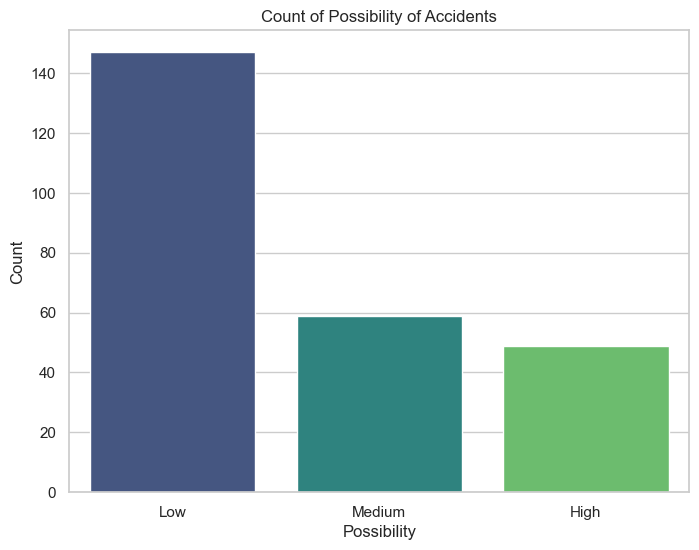

In [114]:
# Countplot for 'Possibility'
plt.figure(figsize=(8, 6))
sns.countplot(x='Possibility', data=df, palette='viridis')
plt.title('Count of Possibility of Accidents')
plt.xlabel('Possibility')
plt.ylabel('Count')
plt.show()

In [137]:
import pandas as pd

# Load the datasets
df_long_lat = pd.read_csv('LONG_LAT.csv')
df_today = pd.read_csv('TODAY.csv')
df_final_possibility = pd.read_csv('FINAL_POSIBILITY.csv')


## Bar Plot for Total Number of Accidents by Weather Type

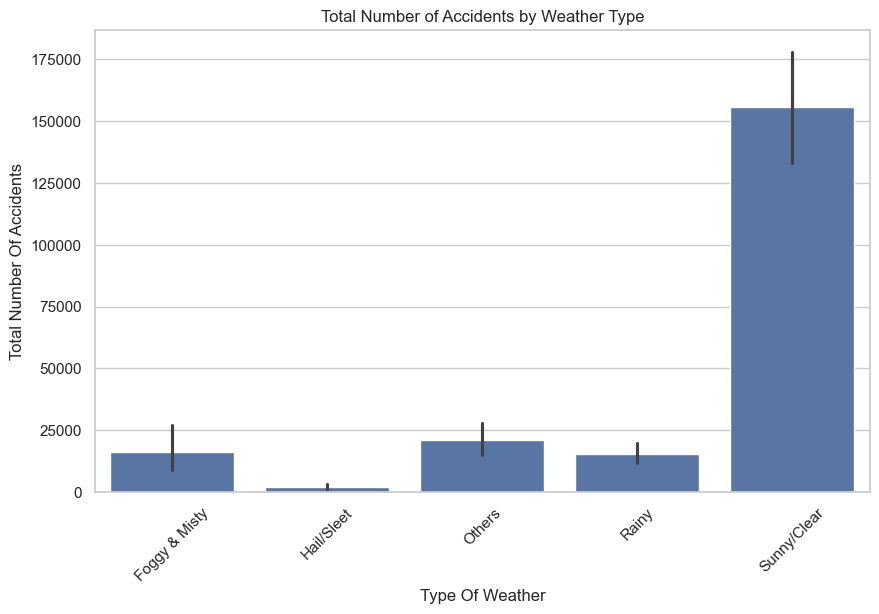

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_long_lat, x='Type Of Weather', y='Total Number Of Accidents  (UOM:Number)', estimator=sum)
plt.title('Total Number of Accidents by Weather Type')
plt.xlabel('Type Of Weather')
plt.ylabel('Total Number Of Accidents')
plt.xticks(rotation=45)
plt.show()


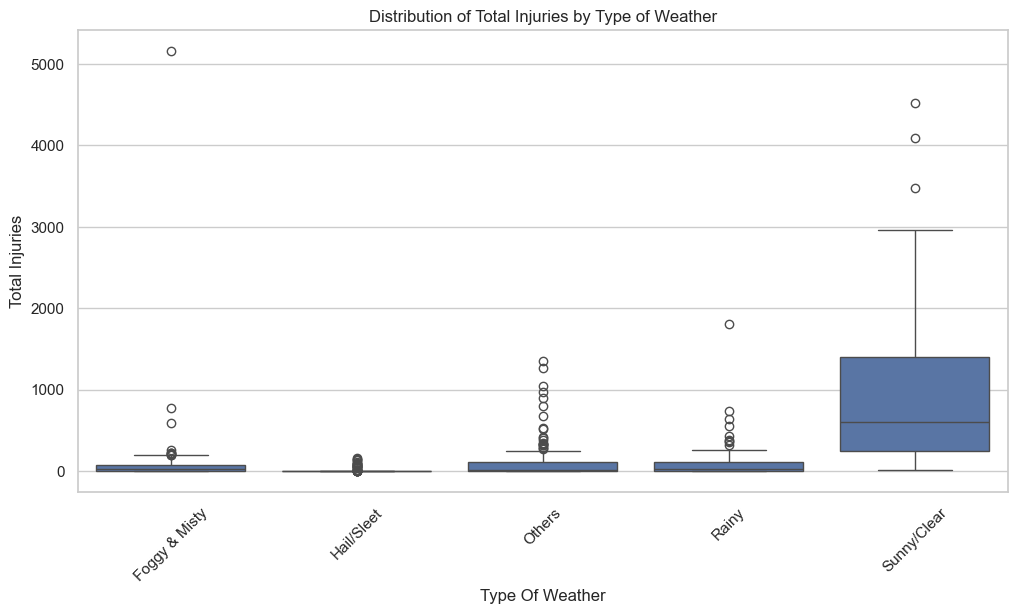

In [129]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_today, x='Type Of Weather', y='Number Of Total Injured Persons (UOM:Number)')
plt.title('Distribution of Total Injuries by Type of Weather')
plt.xlabel('Type Of Weather')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.show()


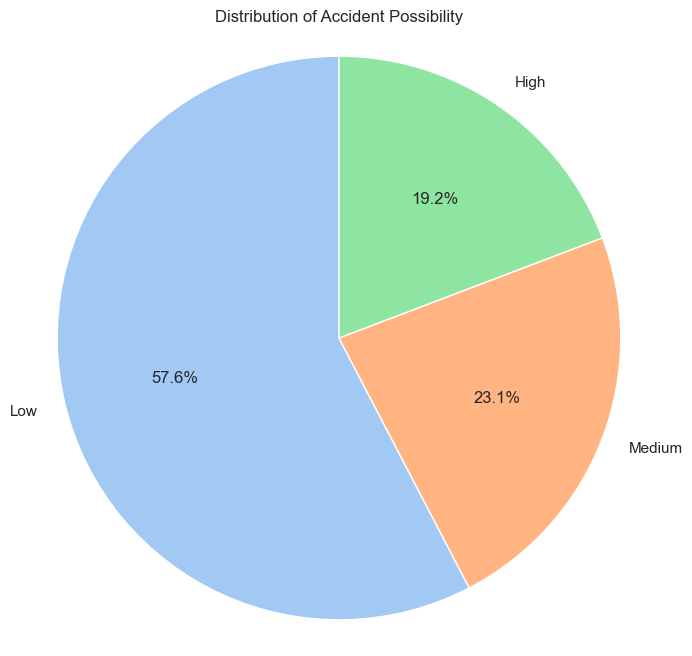

In [130]:
# Pie chart for Possibility distribution
possibility_counts = df_final_possibility['Possibility'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(possibility_counts, labels=possibility_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Distribution of Accident Possibility')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

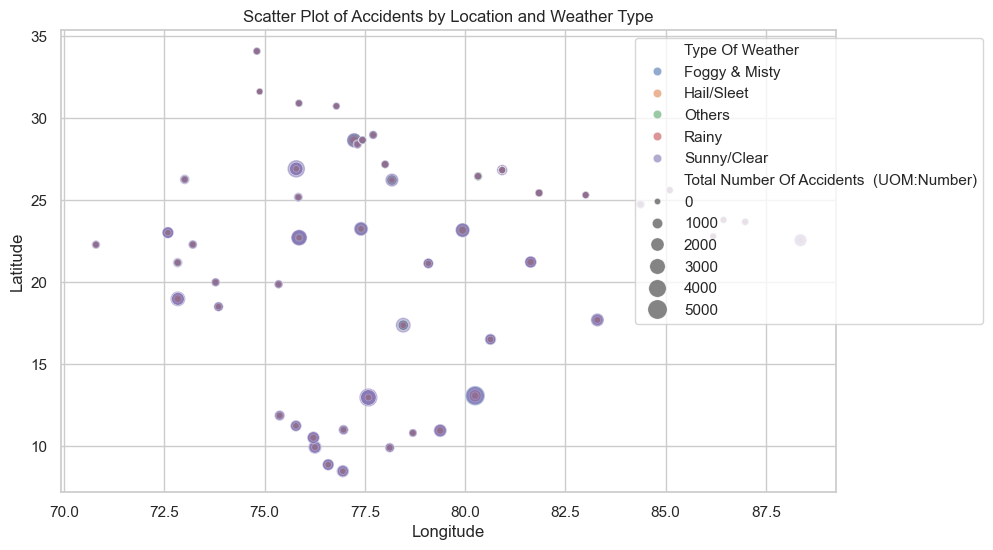

In [131]:
# Scatter plot for Latitude vs Longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_long_lat, x='Long', y='Lat', hue='Type Of Weather', size='Total Number Of Accidents  (UOM:Number)', sizes=(20, 200), alpha=0.6)
plt.title('Scatter Plot of Accidents by Location and Weather Type')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


C:\Users\Rajagopalan M P\AppData\Local\Temp\ipykernel_19408\3414187465.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_today, x='Type Of Weather', y='Total Number Of Accidents  (UOM:Number)', palette='Set2')


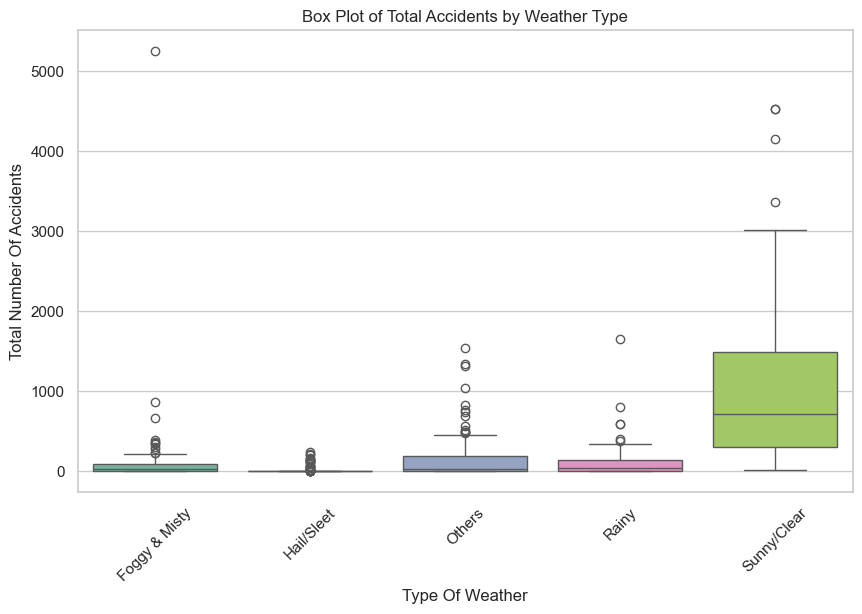

In [132]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_today, x='Type Of Weather', y='Total Number Of Accidents  (UOM:Number)', palette='Set2')
plt.title('Box Plot of Total Accidents by Weather Type')
plt.xlabel('Type Of Weather')
plt.ylabel('Total Number Of Accidents')
plt.xticks(rotation=45)
plt.show()


## Scatter plot

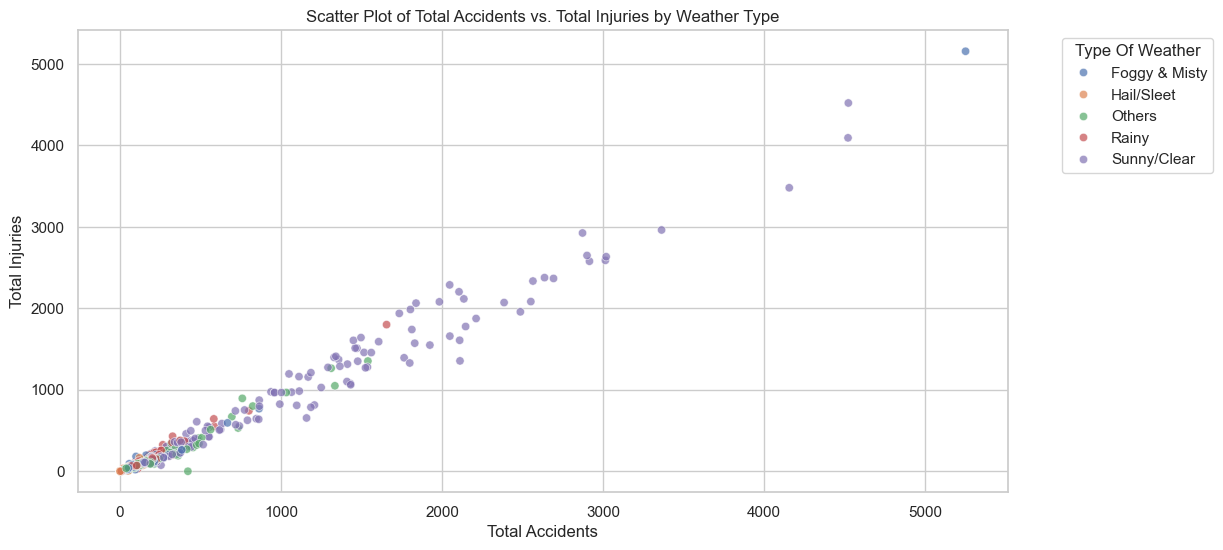

In [133]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_today, x='Total Number Of Accidents  (UOM:Number)', y='Number Of Total Injured Persons (UOM:Number)', hue='Type Of Weather', alpha=0.7)
plt.title('Scatter Plot of Total Accidents vs. Total Injuries by Weather Type')
plt.xlabel('Total Accidents')
plt.ylabel('Total Injuries')
plt.legend(title='Type Of Weather', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Histplot

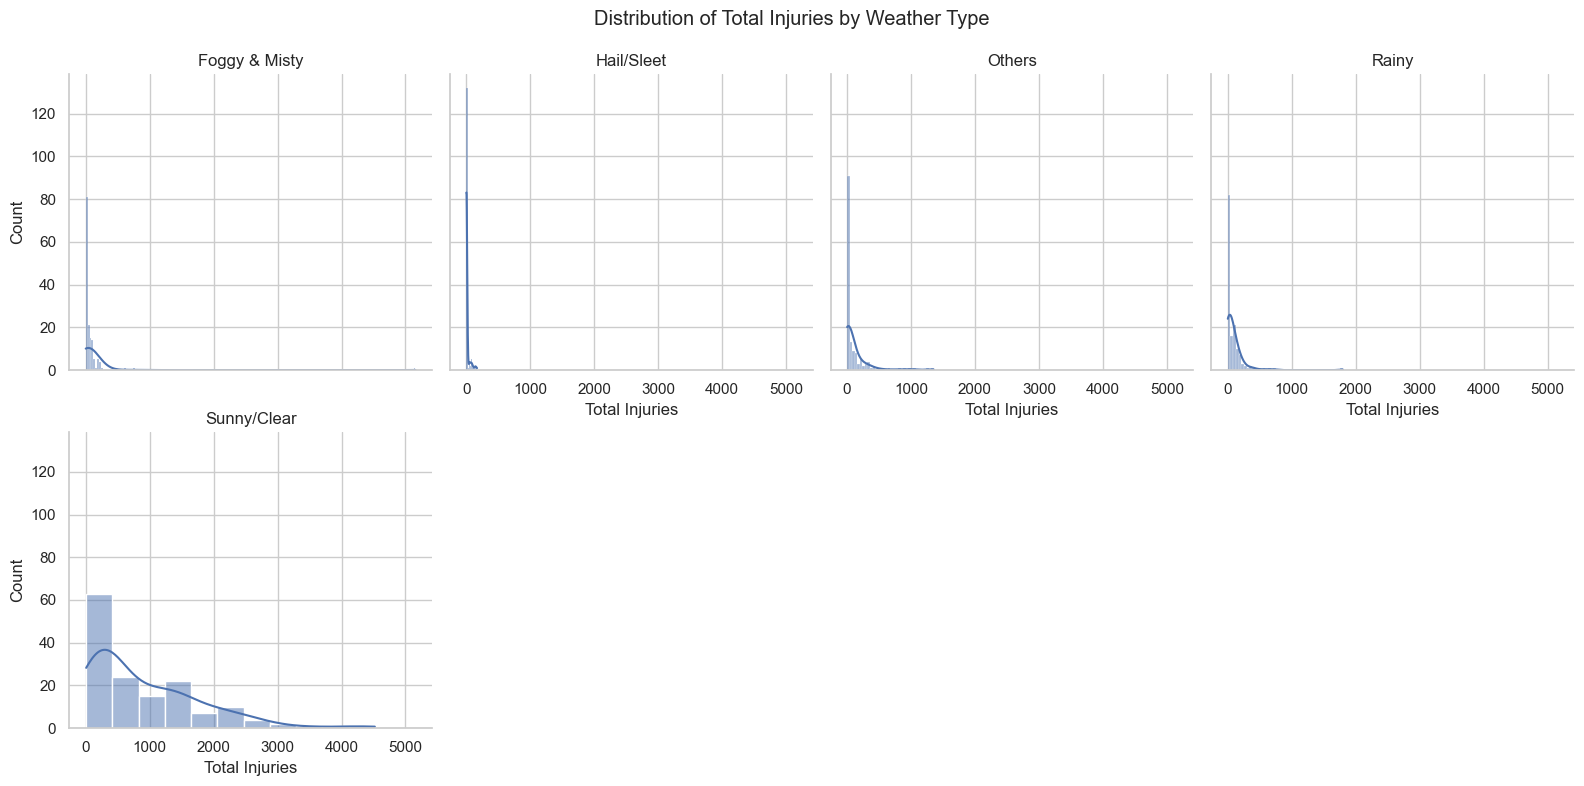

In [134]:
g = sns.FacetGrid(df_today, col='Type Of Weather', col_wrap=4 ,height=4)
g.map(sns.histplot, 'Number Of Total Injured Persons (UOM:Number)', kde=True)
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Total Injuries", "Count")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Total Injuries by Weather Type')
plt.show()


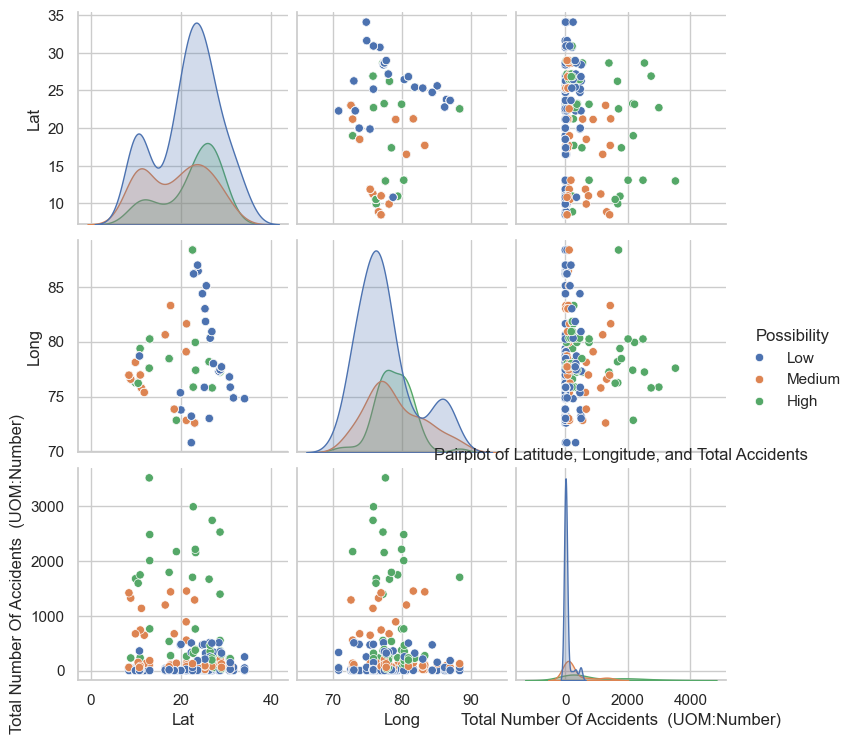

In [140]:
#3. Pairplot to visualize relationships
sns.pairplot(df_final_possibility, hue='Possibility', vars=['Lat', 'Long', 'Total Number Of Accidents  (UOM:Number)'])
plt.title('Pairplot of Latitude, Longitude, and Total Accidents')
plt.show()

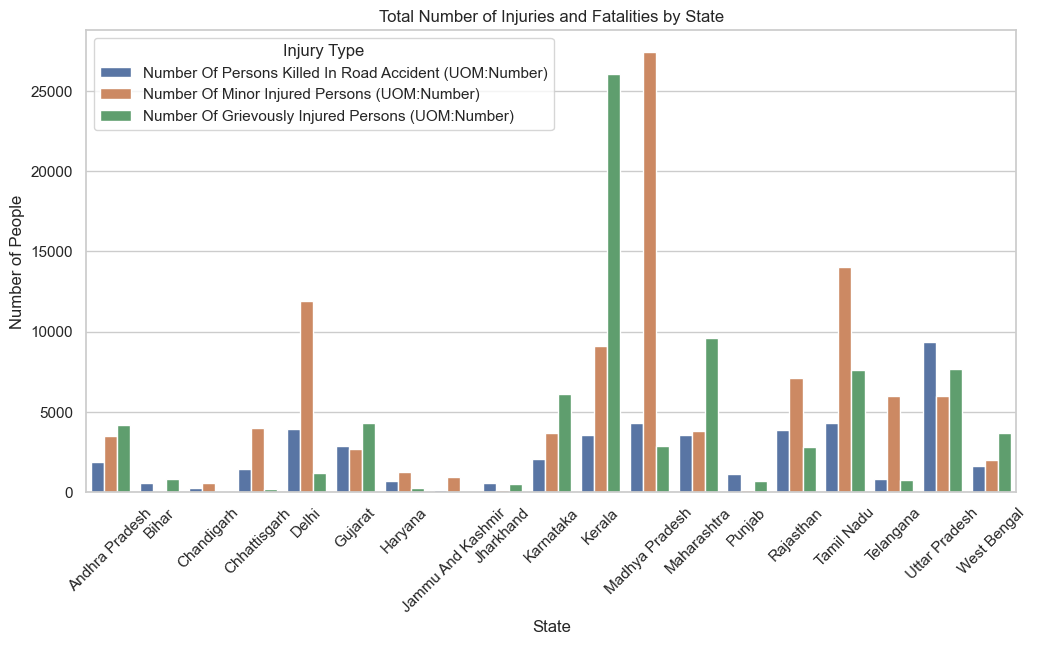

In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your accident data
df = pd.read_csv('TODAY.csv')

# Set the style of seaborn
sns.set(style="whitegrid")

# 1. Bar Plot to show the number of killed, minorly injured, and grievously injured in different states
plt.figure(figsize=(12, 6))
bar_data = df.groupby('State').agg({
    'Number Of Persons Killed In Road Accident (UOM:Number)': 'sum',
    'Number Of Minor Injured Persons (UOM:Number)': 'sum',
    'Number Of Grievously Injured Persons (UOM:Number)': 'sum'
}).reset_index()

bar_data = bar_data.melt(id_vars='State', 
                          value_vars=['Number Of Persons Killed In Road Accident (UOM:Number)', 
                                      'Number Of Minor Injured Persons (UOM:Number)', 
                                      'Number Of Grievously Injured Persons (UOM:Number)'], 
                          var_name='Injury Type', 
                          value_name='Count')

sns.barplot(x='State', y='Count', hue='Injury Type', data=bar_data)
plt.xticks(rotation=45)
plt.title('Total Number of Injuries and Fatalities by State')
plt.xlabel('State')
plt.ylabel('Number of People')
plt.legend(title='Injury Type')
plt.show()


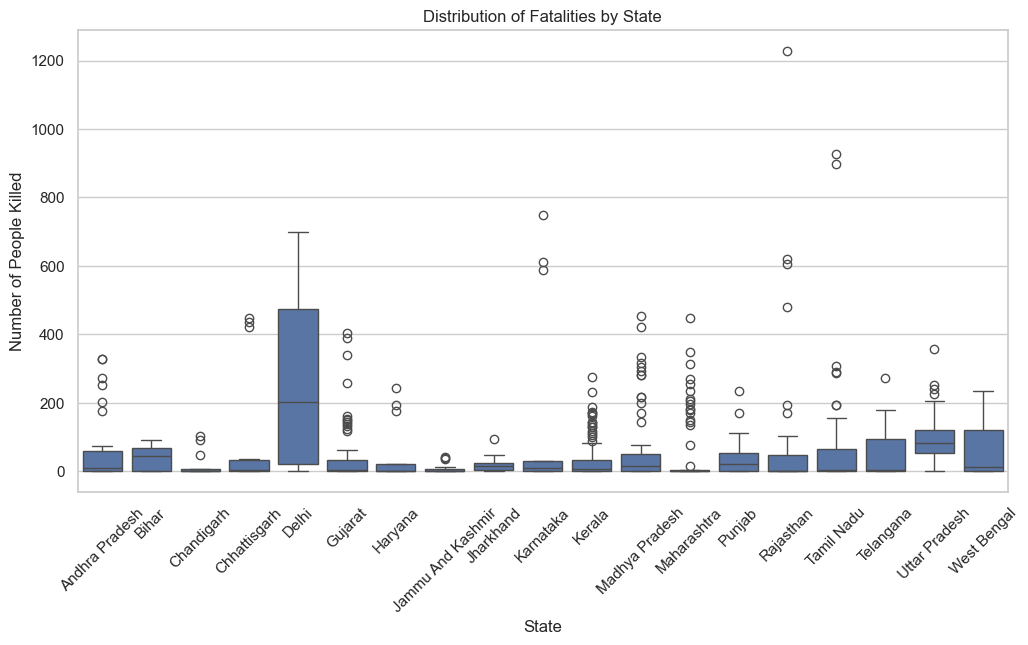

In [142]:
# 2. Box Plot to show distribution of injuries across states
plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='Number Of Persons Killed In Road Accident (UOM:Number)', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of Fatalities by State')
plt.xlabel('State')
plt.ylabel('Number of People Killed')
plt.show()


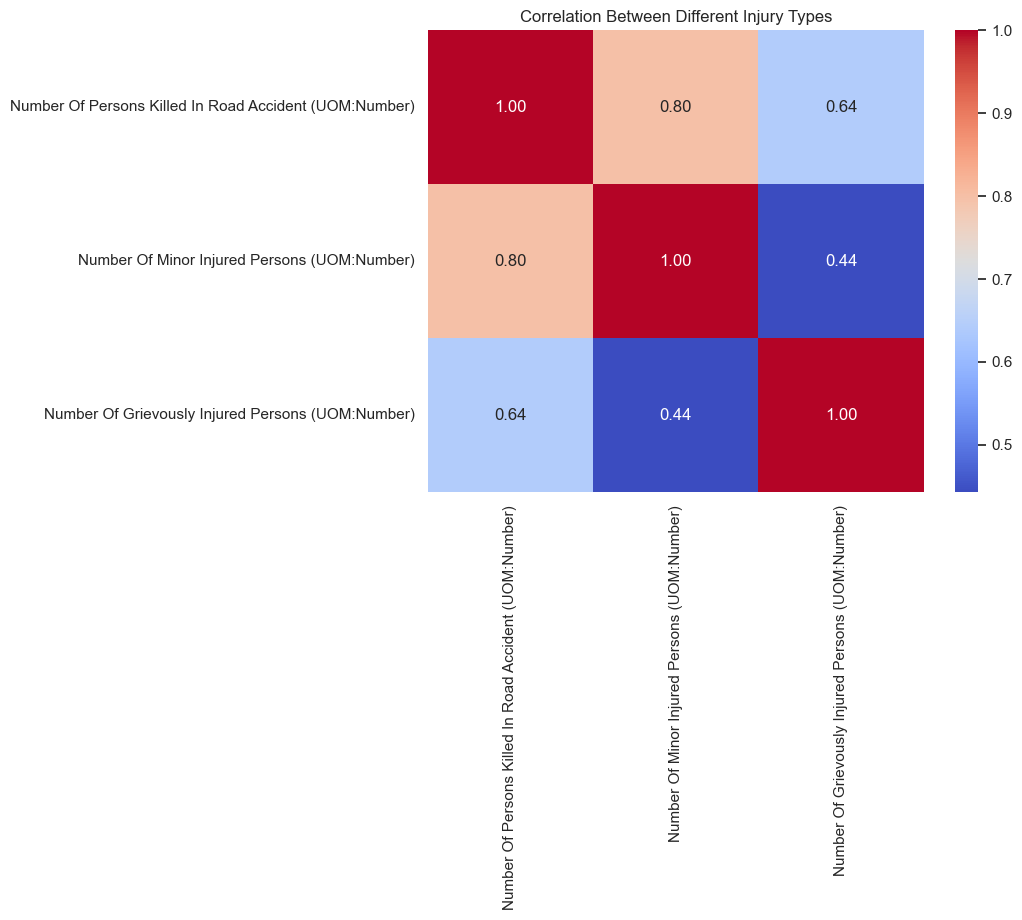

In [143]:
# 4. Heatmap to show correlation between different injury types
correlation_data = df[['Number Of Persons Killed In Road Accident (UOM:Number)', 
                        'Number Of Minor Injured Persons (UOM:Number)', 
                        'Number Of Grievously Injured Persons (UOM:Number)']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Different Injury Types')
plt.show()